# S&P 500 Trading Algorithm

This notebook implements a trading algorithm for the S&P 500 using machine learning models. We will use available parameters as signals and build models like FFNN, LSTM, and CNN.

## Data Loading and Exploration

In [113]:
import pandas as pd
import numpy as np


# Load the CSV data
data = pd.read_csv("C:/Users/David/Documents/GitHub/Quantitative_Trading_Algorithm/output.csv")

# Print the columns to understand the data structure
print("Data Columns:")
print(data.columns)

# Based on the legend, we should map these columns to lowercase
selected_columns = [
    'emp', 'pe', 'cape', 'dy', 'rho', 'day', 'month', 'year',
    'mov', 'ir', 'rr',
    'y02', 'y10', 'stp', 'cf', 'mg', 'rv', 'ed', 'un',
    'gdp', 'm2', 'cpi', 'dil', 'yss', 'nyf',
    '_au', '_dxy', '_lcp', '_ty', '_oil',
    '_mkt', '_va', '_gr'
]

# Check if the selected columns are in the data
available_columns = [col for col in selected_columns if col in data.columns]
print("Selected Available Columns:")
print(available_columns)

# Extracting the relevant columns
data = data[available_columns + ['snp']]  # Including 'snp' as target

Data Columns:
Index(['emp', 'pe', 'cape', 'dy', 'rho', 'mov', 'ir', 'rr', 'y02', 'y10',
       'stp', 'cf', 'mg', 'rv', 'ed', 'un', 'gdp', 'm2', 'cpi', 'dil', 'yss',
       'nyf', '_au', '_dxy', '_lcp', '_ty', '_oil', '_mkt', '_va', '_gr',
       'snp', 'date', 'year', 'month', 'day', 'label'],
      dtype='object')
Selected Available Columns:
['emp', 'pe', 'cape', 'dy', 'rho', 'day', 'month', 'year', 'mov', 'ir', 'rr', 'y02', 'y10', 'stp', 'cf', 'mg', 'rv', 'ed', 'un', 'gdp', 'm2', 'cpi', 'dil', 'yss', 'nyf', '_au', '_dxy', '_lcp', '_ty', '_oil', '_mkt', '_va', '_gr']


## Preprocess and Feature Engineering

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Handle missing values
data = data.dropna()

# Extract features and target
features = data.drop(columns=['snp'])
target = data['snp']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

print("Feature Engineering and Data Preprocessing Complete.")


Feature Engineering and Data Preprocessing Complete.


## Custom Train-Test Split for LSTM To Keep Data Sequential

In [115]:
import numpy as np
from sklearn.model_selection import train_test_split

def custom_train_test_split_with_indices(features, target, sequence_length=10, test_size=0.2):
    # Create sequences
    sequences = []
    labels = []
    indices = []
    for i in range(len(features) - sequence_length):
        sequences.append(features[i:i+sequence_length])
        labels.append(target[i+sequence_length])
        indices.append(i+sequence_length)
    
    X = np.array(sequences)
    y = np.array(labels)
    indices = np.array(indices)
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
        X, y, indices, test_size=test_size, random_state=42
    )
    
    # Reshape data for LSTM (needs 3D input: [samples, time steps, features])
    X_train_lstm_prepared = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
    X_test_lstm_prepared = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))
    
    y_train_lstm_prepared = y_train
    y_test_lstm_prepared = y_test
    
    return (X_train_lstm_prepared, y_train_lstm_prepared, train_indices,
            X_test_lstm_prepared, y_test_lstm_prepared, test_indices)

# Use the function
X_train_lstm_prepared, y_train_lstm_prepared, train_indices, X_test_lstm_prepared, y_test_lstm_prepared, test_indices = custom_train_test_split_with_indices(features_scaled, target)

## Model Implementation

### Feed-Forward Neural Network (FFNN)

Epoch 1/400


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3815624.2500 - val_loss: 3776290.0000
Epoch 2/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3778010.2500 - val_loss: 3546937.5000
Epoch 3/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3412640.5000 - val_loss: 3153133.5000
Epoch 4/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2891480.2500 - val_loss: 2566018.7500
Epoch 5/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2407202.0000 - val_loss: 1884306.2500
Epoch 6/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1657392.0000 - val_loss: 1141745.7500
Epoch 7/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1025215.0000 - val_loss: 540289.2500
Epoch 8/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 518278.9688 - val_loss: 246545.3438
Epoch 9/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 280358.6562 - val_loss: 166366.2500
Epoch 10/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 192537.5625 - val_loss: 120592.7422
Epoch 11/400
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

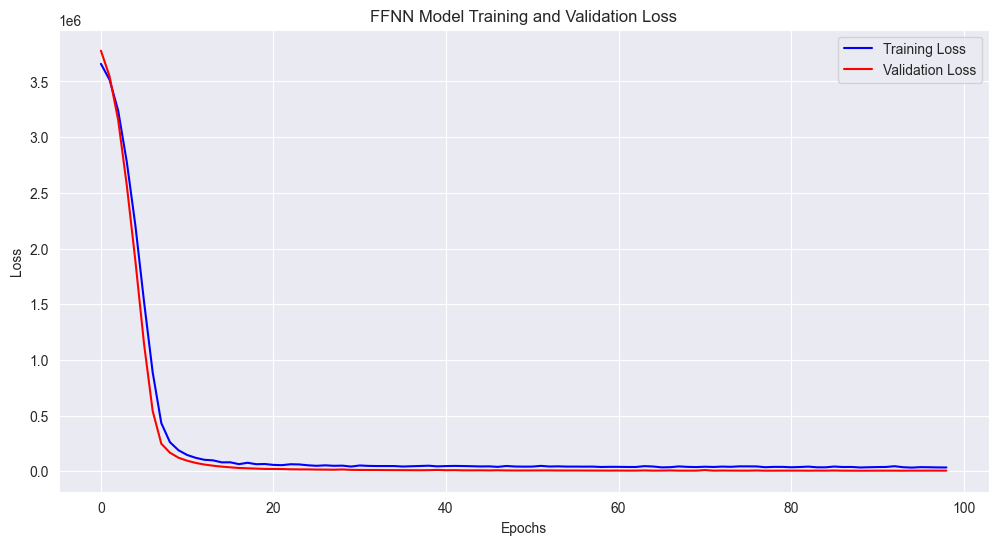

In [116]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop

# Define the FFNN model creation function

def create_ffnn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')
    return model

# Training with all parameters
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

ffnn_model = create_ffnn_model(X_train_scaled.shape[1])
ffnn_history = ffnn_model.fit(X_train_scaled, y_train, epochs=400, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

ffnn_evaluation = ffnn_model.evaluate(X_test_scaled, y_test)
print(f"FFNN Model Test Loss: {ffnn_evaluation}")

ffnn_predictions = ffnn_model.predict(X_test_scaled)
print("FFNN Model Training and Evaluation Complete.")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(ffnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(ffnn_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('FFNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Long Short-Term Memory Network (LSTM)

Epoch 1/100


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 3652762.5000 - val_loss: 3914823.7500
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3922365.5000 - val_loss: 3853315.0000
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3567070.5000 - val_loss: 3756431.2500
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3384413.0000 - val_loss: 3629507.0000
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3445816.2500 - val_loss: 3361194.2500
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3472736.5000 - val_loss: 3038218.5000
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2862532.7500 - val_loss: 2664381.7500
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2787268.2500 - val_loss: 2231129.0000
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2246653.0000 - val_loss: 1711462.6250
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1890393.0000 - val_loss: 1048182.7500
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 

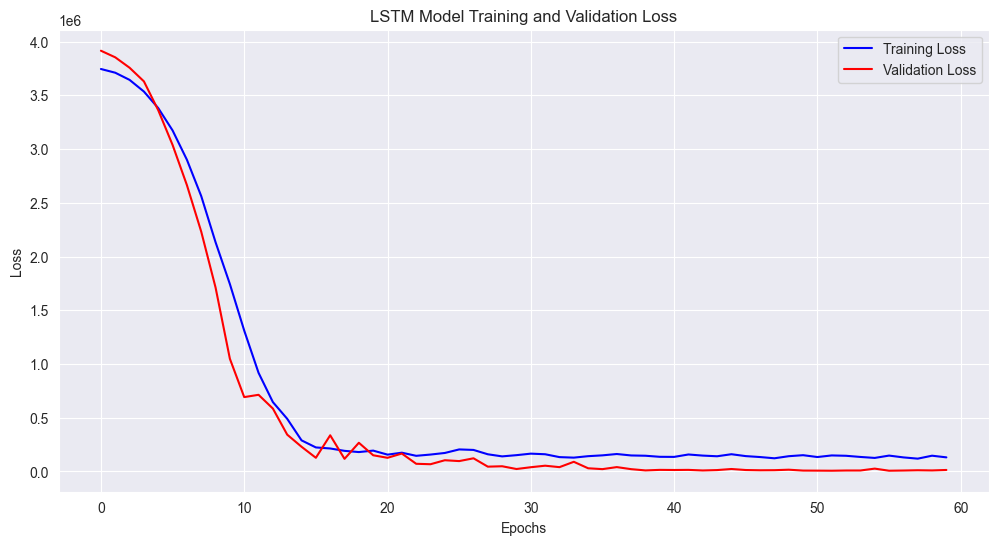

In [117]:
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model creation function
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.3))  # Add dropout for regularization
    model.add(BatchNormalization())  # Add batch normalization
    model.add(Dense(32, activation='relu'))  # Add an additional dense layer
    model.add(Dropout(0.3))  # Add another dropout for regularization
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training with all parameters
lstm_model = create_lstm_model((X_train_lstm_prepared.shape[1], X_train_lstm_prepared.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lstm_history = lstm_model.fit(X_train_lstm_prepared, y_train_lstm_prepared, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

lstm_evaluation = lstm_model.evaluate(X_test_lstm_prepared, y_test_lstm_prepared)
print(f"LSTM Model Test Loss: {lstm_evaluation}")

lstm_predictions = lstm_model.predict(X_test_lstm_prepared)
print("LSTM Model Training and Evaluation Complete.")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss', color='blue')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('LSTM Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Convolutional Neural Network (CNN)

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3358722.7500 - val_loss: 1044251.3125
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 971077.7500 - val_loss: 522309.3125
Epoch 3/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 418541.3750 - val_loss: 178590.1562
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 192146.1406 - val_loss: 142268.3906
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 144652.2031 - val_loss: 112248.8984
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 126785.1719 - val_loss: 98096.3125
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 101141.1953 - val_loss: 83213.7109
Epoch 8/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82176.2891 - val_loss: 67968.2891
Epoch 9/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73186.6641 - val_loss: 56957.8359
Epoch 10/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58742.5898 - val_loss: 44736.3281
Epoch 11/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48969.4219 - val_

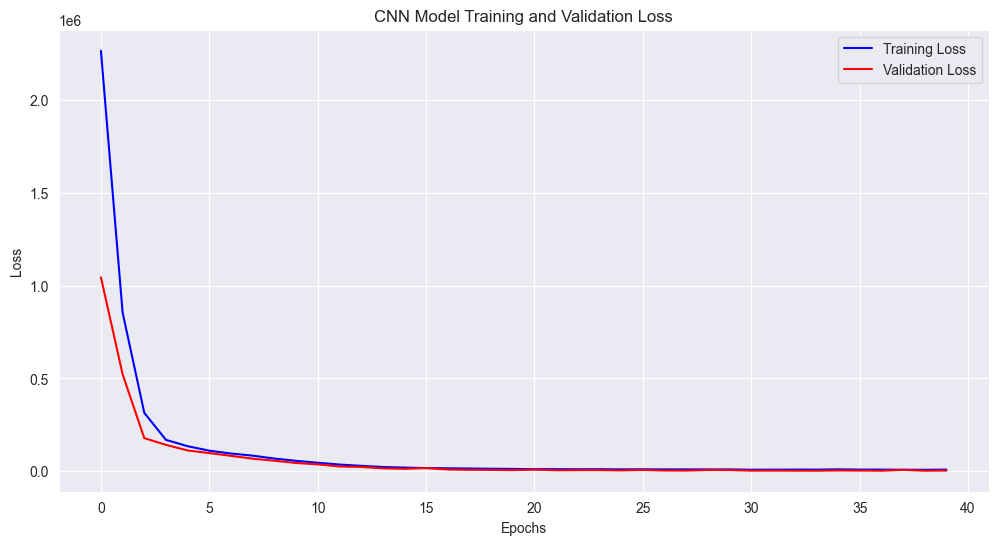

In [118]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Reshape, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the CNN model creation function
def create_cnn_model(input_dim):
    model = Sequential()
    model.add(Reshape((input_dim, 1), input_shape=(input_dim,)))
    model.add(Conv1D(filters=128, kernel_size=4, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.25))  # Dropout layer to reduce overfitting
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training with all parameters
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn_model = create_cnn_model(X_train_scaled.shape[1])
cnn_history = cnn_model.fit(X_train_scaled, y_train, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation = cnn_model.evaluate(X_test_scaled, y_test)
print(f"CNN Model Test Loss: {cnn_evaluation}")

cnn_predictions = cnn_model.predict(X_test_scaled)
print("CNN Model Training and Evaluation Complete.")

plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('CNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Auto-encoder

Different data pre-rocessing and model implementation for autoencoder

Epoch 1/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1304 - val_loss: 0.0302
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0425 - val_loss: 0.0215
Epoch 3/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0321 - val_loss: 0.0183
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266 - val_loss: 0.0160
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243 - val_loss: 0.0134
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0211 - val_loss: 0.0119
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - val_loss: 0.0111
Epoch 8/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178 - val_loss: 0.0096
Epoch 9/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 - val_loss: 0.0088
Epoch 10/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0152 - val_loss: 0.0083
Epoch 11/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146 - val_loss: 0.0081
Epoch 12/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0136 - val_lo

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3586431.5000 - val_loss: 3866733.0000
Epoch 2/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3563062.7500 - val_loss: 3863142.2500
Epoch 3/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3822213.0000 - val_loss: 3860576.7500
Epoch 4/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3559725.2500 - val_loss: 3860076.5000
Epoch 5/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3686419.7500 - val_loss: 3861279.2500
Epoch 6/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3865892.7500 - val_loss: 3858079.7500
Epoch 7/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3754160.7500 - val_loss: 3851387.0000
Epoch 8/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3609959.0000 - val_loss: 3840963.0000
Epoch 9/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3801289.0000 - val_loss: 3833008.7500
Epoch 10/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3686733.5000 - val_loss: 3816376.7500
Epoch 11/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0

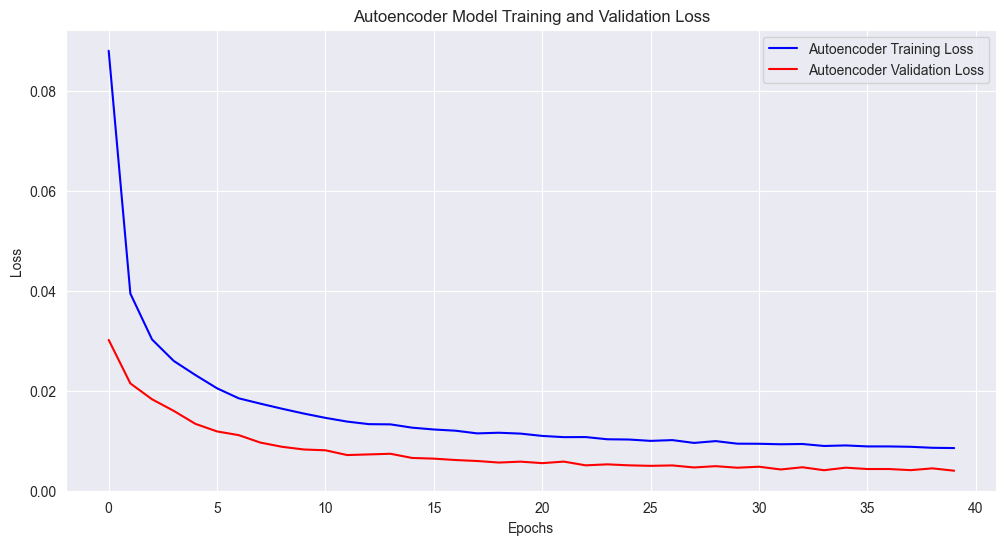

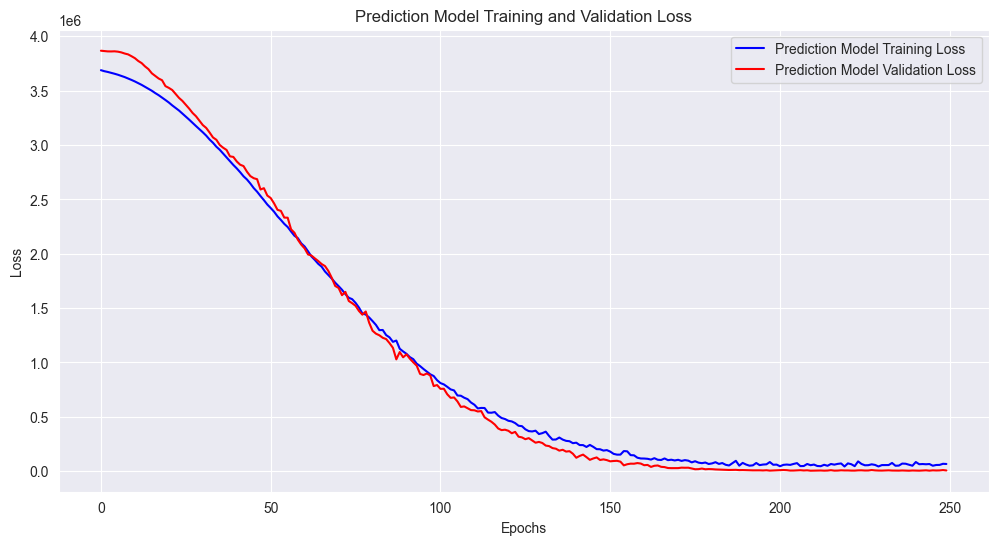

In [119]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the autoencoder model creation function
def create_autoencoder_model(input_dim, encoding_dim=32):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dropout(0.25)(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dropout(0.25)(decoded)
    decoded = Dense(input_dim, activation='linear')(decoded)

    # Autoencoder
    autoencoder = Model(input_layer, decoded)

    # Separate encoder model
    encoder = Model(input_layer, encoded)

    # Compile the model
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return autoencoder, encoder

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the autoencoder
input_dim = X_train_scaled.shape[1]
autoencoder, encoder = create_autoencoder_model(input_dim)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=40,
                          batch_size=16,
                          validation_split=0.2,
                          verbose=1,
                          callbacks=[early_stop])

# Encode the data
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Train a simple model to predict S&P using encoded features
prediction_model = Sequential([
    Dense(128, activation='relu', input_shape=(encoder.output_shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)
])

prediction_model.compile(optimizer='adam', loss='mean_squared_error')

# Use a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

prediction_history = prediction_model.fit(X_train_encoded, y_train,
                                          epochs=250,
                                          batch_size=32,
                                          validation_split=0.2,
                                          verbose=1)
                                          # callbacks=[early_stop])

# Evaluate the model
test_loss = prediction_model.evaluate(X_test_encoded, y_test)
print(f"Autoencoder + Prediction Model Test Loss: {test_loss}")

# Make predictions
autoencoder_predictions = prediction_model.predict(X_test_encoded)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Autoencoder Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Autoencoder Validation Loss', color='red')
plt.title('Autoencoder Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(prediction_history.history['loss'], label='Prediction Model Training Loss', color='blue')
plt.plot(prediction_history.history['val_loss'], label='Prediction Model Validation Loss', color='red')
plt.title('Prediction Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate models with MSE, Sharpe ratio, R2 and IC

Get the in-sample and out-of-sample R-Squared and MSE
The Information Coefficient (IC) measures the correlation between predicted and actual returns.
see: https://www.investopedia.com/terms/i/information-coefficient.asp
#### Sharpe Ratio
The Sharpe ratio is a measure of risk-adjusted return, calculated as the average return earned in excess of the risk-free rate per unit of volatility or total risk. 


In [120]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_proportion_correct(predictions, actuals):
    predictions = predictions.flatten()
    actuals = actuals
    min_length = min(len(predictions), len(actuals))
    predictions = predictions[:min_length]
    actuals = actuals[:min_length]
    actual_directions = np.diff(actuals) > 0
    predicted_directions = np.diff(predictions) > 0
    correct_predictions = np.where(predicted_directions == actual_directions, 1, 0)
    proportion_correct = np.mean(correct_predictions)
    return proportion_correct

def calculate_ic(proportion_correct):
    return (2 * proportion_correct) - 1

def calculate_sharpe_ratio(predictions, actuals, risk_free_rate=0):
    predictions = np.array(predictions).flatten()
    actuals = np.array(actuals).flatten()
    
    strategy_returns = []
    for t in range(1, len(predictions)):
        if predictions[t-1] <= predictions[t] and actuals[t-1] <= actuals[t]:
            strategy_returns.append(actuals[t] - actuals[t-1])  # Long position
        elif predictions[t-1] > predictions[t] and actuals[t-1] > actuals[t]:
            strategy_returns.append(actuals[t-1] - actuals[t])  # Short position
        else:
            strategy_returns.append(0)  # No position
    
    strategy_returns = np.array(strategy_returns)
    
    mean_return = np.mean(strategy_returns)
    std_dev = np.std(strategy_returns)
    
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev
    
    return sharpe_ratio


scaler_cnn_pred = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_cnn_pred.fit_transform(X_train)
# Evaluate in-sample predictions
ffnn_train_predictions = ffnn_model.predict(X_train)
lstm_train_predictions = lstm_model.predict(X_train_lstm_prepared)
cnn_train_predictions = cnn_model.predict(X_train_scaled)
autoencoder_train_predictions = prediction_model.predict(X_train_encoded)

# # Ensure the length consistency of predictions and actuals
# def ensure_length_consistency(predictions, actuals):
#     min_length = min(len(predictions), len(actuals))
#     return predictions[:min_length], actuals[:min_length]

# FFNN performance
# ffnn_predictions, y_test = ensure_length_consistency(ffnn_predictions, y_test)
ffnn_in_sample_r2 = r2_score(y_train, ffnn_train_predictions)
ffnn_out_sample_r2 = r2_score(y_test, ffnn_predictions)
ffnn_in_sample_mse = mean_squared_error(y_train, ffnn_train_predictions)
ffnn_out_sample_mse = mean_squared_error(y_test, ffnn_predictions)
ffnn_in_sample_mae = mean_absolute_error(y_train, ffnn_train_predictions)
ffnn_out_sample_mae = mean_absolute_error(y_test, ffnn_predictions)

# LSTM performance
# lstm_predictions, y_test_lstm_prepared = ensure_length_consistency(lstm_predictions, y_test_lstm_prepared)
lstm_in_sample_r2 = r2_score(y_train_lstm_prepared, lstm_train_predictions)
lstm_out_sample_r2 = r2_score(y_test_lstm_prepared, lstm_predictions)
lstm_in_sample_mse = mean_squared_error(y_train_lstm_prepared, lstm_train_predictions)
lstm_out_sample_mse = mean_squared_error(y_test_lstm_prepared, lstm_predictions)
lstm_in_sample_mae = mean_absolute_error(y_train_lstm_prepared, lstm_train_predictions)
lstm_out_sample_mae = mean_absolute_error(y_test_lstm_prepared, lstm_predictions)

# CNN performance
# cnn_predictions, y_test = ensure_length_consistency(cnn_predictions, y_test)
cnn_in_sample_r2 = r2_score(y_train, cnn_train_predictions)
cnn_out_sample_r2 = r2_score(y_test, cnn_predictions)
cnn_in_sample_mse = mean_squared_error(y_train, cnn_train_predictions)
cnn_out_sample_mse = mean_squared_error(y_test, cnn_predictions)
cnn_in_sample_mae = mean_absolute_error(y_train, cnn_train_predictions)
cnn_out_sample_mae = mean_absolute_error(y_test, cnn_predictions)

# Autoencoder performance
# autoencoder_predictions, y_test = ensure_length_consistency(autoencoder_predictions, y_test)
autoencoder_in_sample_r2 = r2_score(y_train, autoencoder_train_predictions)
autoencoder_out_sample_r2 = r2_score(y_test, autoencoder_predictions)
autoencoder_in_sample_mse = mean_squared_error(y_train, autoencoder_train_predictions)
autoencoder_out_sample_mse = mean_squared_error(y_test, autoencoder_predictions)
autoencoder_in_sample_mae = mean_absolute_error(y_train, autoencoder_train_predictions)
autoencoder_out_sample_mae = mean_absolute_error(y_test, autoencoder_predictions)

# Proportion correct and IC calculations
ffnn_in_sample_proportion_correct = calculate_proportion_correct(ffnn_train_predictions, y_train)
ffnn_out_sample_proportion_correct = calculate_proportion_correct(ffnn_predictions, y_test)
ffnn_in_sample_ic = calculate_ic(ffnn_in_sample_proportion_correct)
ffnn_out_sample_ic = calculate_ic(ffnn_out_sample_proportion_correct)

lstm_in_sample_proportion_correct = calculate_proportion_correct(lstm_train_predictions, y_train_lstm_prepared)
lstm_out_sample_proportion_correct = calculate_proportion_correct(lstm_predictions, y_test_lstm_prepared)
lstm_in_sample_ic = calculate_ic(lstm_in_sample_proportion_correct)
lstm_out_sample_ic = calculate_ic(lstm_out_sample_proportion_correct)

cnn_in_sample_proportion_correct = calculate_proportion_correct(cnn_train_predictions, y_train)
cnn_out_sample_proportion_correct = calculate_proportion_correct(cnn_predictions, y_test)
cnn_in_sample_ic = calculate_ic(cnn_in_sample_proportion_correct)
cnn_out_sample_ic = calculate_ic(cnn_out_sample_proportion_correct)

autoencoder_in_sample_proportion_correct = calculate_proportion_correct(autoencoder_train_predictions, y_train)
autoencoder_out_sample_proportion_correct = calculate_proportion_correct(autoencoder_predictions, y_test)
autoencoder_in_sample_ic = calculate_ic(autoencoder_in_sample_proportion_correct)
autoencoder_out_sample_ic = calculate_ic(autoencoder_out_sample_proportion_correct)

# Sharpe ratio calculations
ffnn_sharpe = calculate_sharpe_ratio(ffnn_predictions, y_test)
lstm_sharpe = calculate_sharpe_ratio(lstm_predictions, y_test_lstm_prepared)
cnn_sharpe = calculate_sharpe_ratio(cnn_predictions, y_test)
autoencoder_sharpe = calculate_sharpe_ratio(autoencoder_predictions, y_test)

# Create a table for all metrics
metrics_data = {
    "Model": ["FFNN", "LSTM", "CNN", "Autoencoder"],
    "In-sample MSE": [ffnn_in_sample_mse, lstm_in_sample_mse, cnn_in_sample_mse, autoencoder_in_sample_mse],
    "Out-sample MSE": [ffnn_out_sample_mse, lstm_out_sample_mse, cnn_out_sample_mse, autoencoder_out_sample_mse],
    "In-sample R2": [ffnn_in_sample_r2, lstm_in_sample_r2, cnn_in_sample_r2, autoencoder_in_sample_r2],
    "Out-sample R2": [ffnn_out_sample_r2, lstm_out_sample_r2, cnn_out_sample_r2, autoencoder_out_sample_r2],
    "In-sample MAE": [ffnn_in_sample_mae, lstm_in_sample_mae, cnn_in_sample_mae, autoencoder_in_sample_mae],
    "Out-sample MAE": [ffnn_out_sample_mae, lstm_out_sample_mae, cnn_out_sample_mae, autoencoder_out_sample_mae],
    "In-sample IC": [ffnn_in_sample_ic, lstm_in_sample_ic, cnn_in_sample_ic, autoencoder_in_sample_ic],
    "Out-sample IC": [ffnn_out_sample_ic, lstm_out_sample_ic, cnn_out_sample_ic, autoencoder_out_sample_ic],
    "Sharpe Ratio": [ffnn_sharpe, lstm_sharpe, cnn_sharpe, autoencoder_sharpe]
}

metrics_df = pd.DataFrame(metrics_data)
display(metrics_df)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


,Model,In-sample MSE,Out-sample MSE,In-sample R2,Out-sample R2,In-sample MAE,Out-sample MAE,In-sample IC,Out-sample IC,Sharpe Ratio
0,FFNN,5649.771137,7206.074092,0.995651,0.995138,51.365716,56.154531,0.940199,0.946809,1.078910
1,LSTM,7361.041208,10936.790309,0.994460,0.991932,63.401032,70.817413,0.958584,0.951872,1.124613
2,CNN,4458.190960,6000.918224,0.996568,0.995951,45.034476,47.528864,0.944186,0.936170,1.079451
3,Autoencoder,6450.413948,10578.681170,0.995035,0.992862,53.464359,67.494818,0.945515,0.968085,1.079600


## Show the Actual vs. Predicted Values
We will create charts to visualize the actual vs. predicted values for each model and discuss the results.

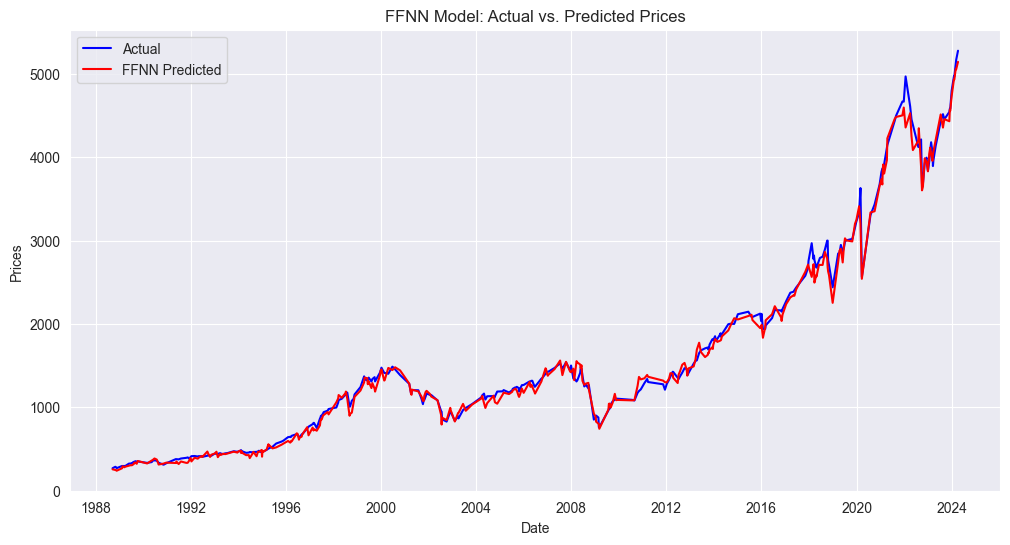

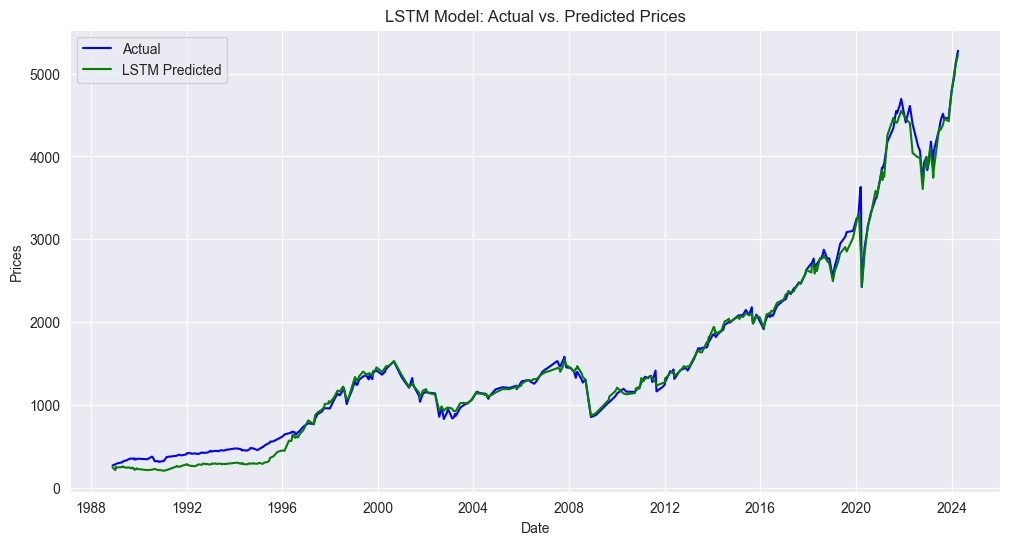

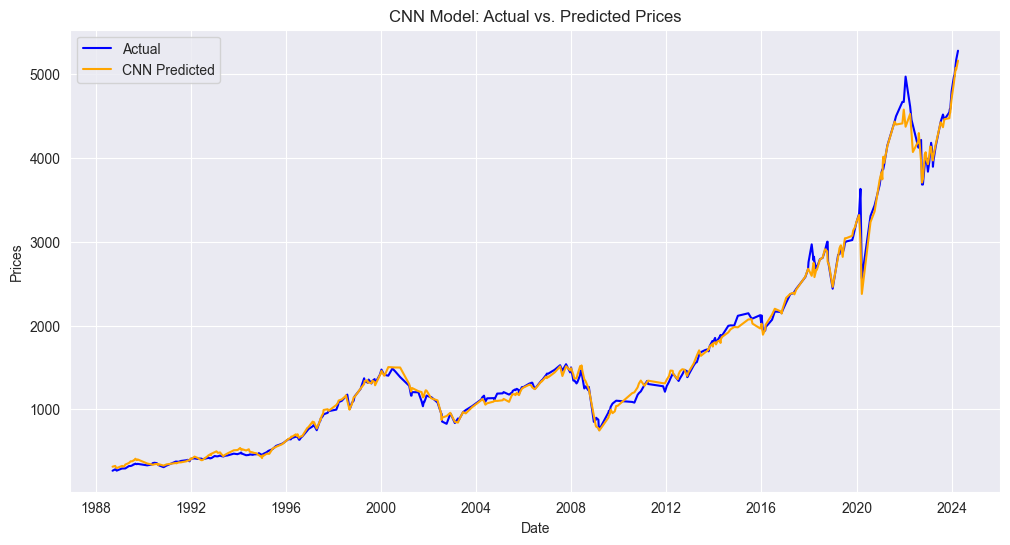

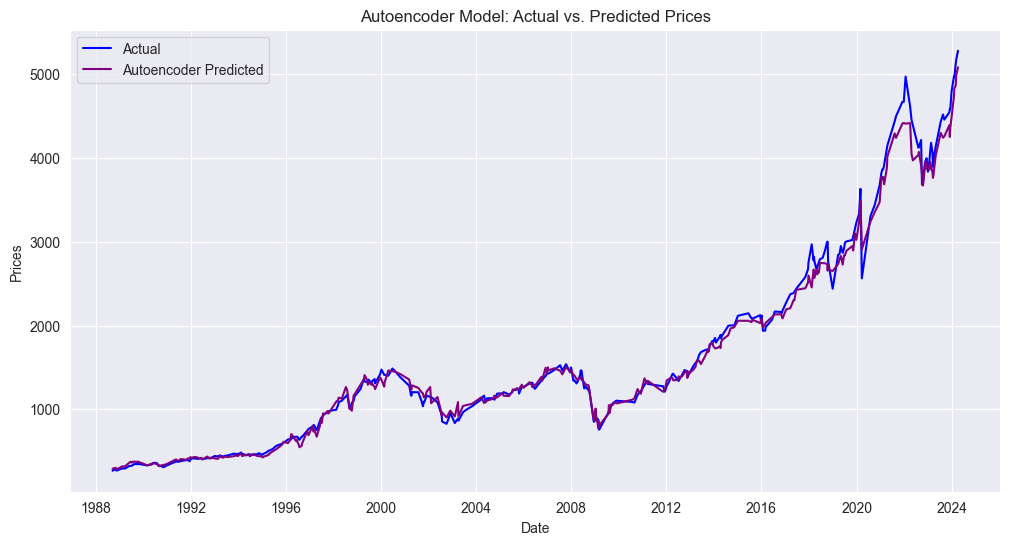

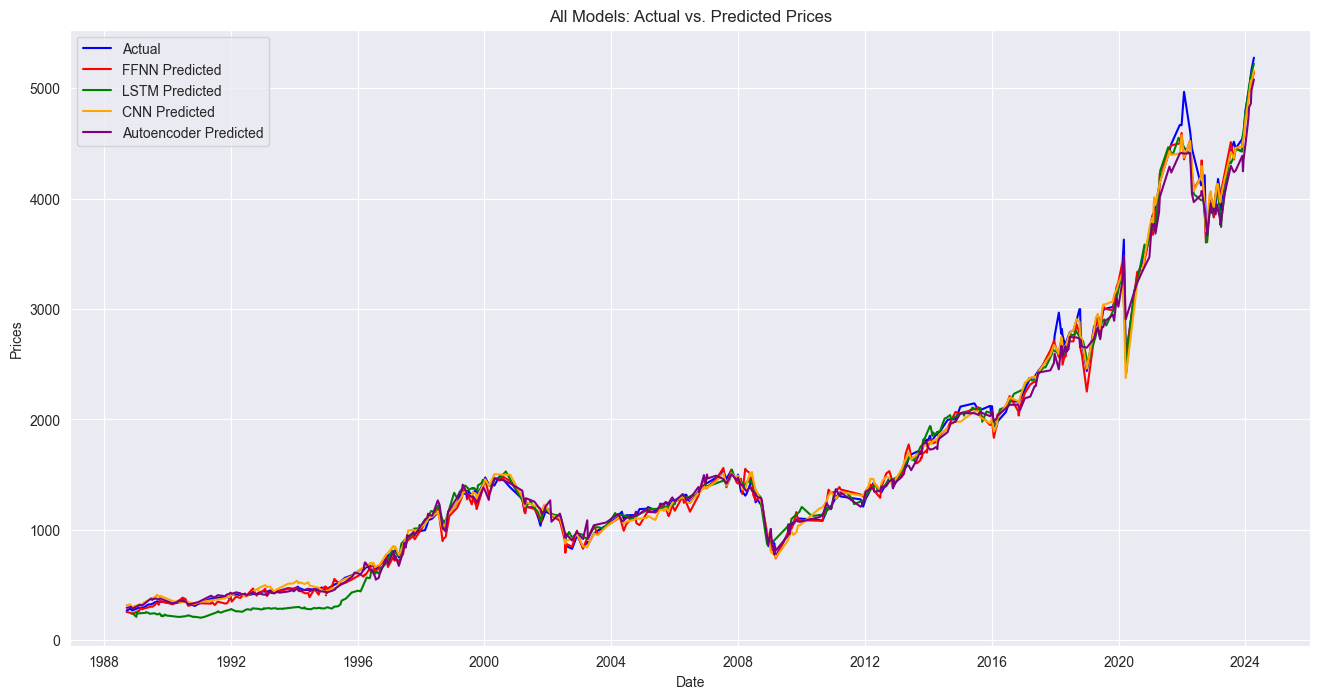

In [121]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Create a Date column from 'day', 'month', and 'year'
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Ensure all predictions and actuals are 1-dimensional
y_test_series = pd.Series(y_test.squeeze(), index=y_test.index, name='Actual')
y_test_lstm_series = pd.Series(y_test_lstm_prepared.squeeze(), index=y_test_lstm_prepared, name='Actual')
ffnn_predictions_flat = ffnn_predictions.flatten()
lstm_predictions_flat = lstm_predictions.flatten()
cnn_predictions_flat = cnn_predictions.flatten()
autoencoder_predictions_flat = autoencoder_predictions.flatten()

# Create DataFrame for y_test and ffnn_predictions
ffnn_test_df = pd.DataFrame({
    'Actual': y_test_series.values,
    'FFNN_Predicted': ffnn_predictions_flat
}, index=y_test_series.index)

# Merge ffnn_test_df with the original data using the index
ffnn_merged_df = data.join(ffnn_test_df, how='inner')

# Plot actual vs. predicted values for FFNN
plt.figure(figsize=(12, 6))
plt.plot(ffnn_merged_df['Date'], ffnn_merged_df['Actual'], label='Actual', color='blue')
plt.plot(ffnn_merged_df['Date'], ffnn_merged_df['FFNN_Predicted'], label='FFNN Predicted', color='red')
plt.title('FFNN Model: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# LSTM plot
lstm_test_df = pd.DataFrame({
    'Date_lstm': data.loc[test_indices, 'Date'].values,
    'Actual_lstm': y_test_lstm_prepared,
    'LSTM_Predicted': lstm_predictions.flatten()
}, index=test_indices)

lstm_merged_df = data.join(lstm_test_df, how='inner', lsuffix='_orig', rsuffix='_lstm')

plt.figure(figsize=(12, 6))
plt.plot(lstm_merged_df['Date_lstm'], lstm_merged_df['Actual_lstm'], label='Actual', color='blue')
plt.plot(lstm_merged_df['Date_lstm'], lstm_merged_df['LSTM_Predicted'], label='LSTM Predicted', color='green')
plt.title('LSTM Model: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# CNN plot
cnn_test_df = pd.DataFrame({
    'Date_cnn': data.loc[y_test.index, 'Date'].values,
    'Actual_cnn': y_test.values,
    'CNN_Predicted': cnn_predictions.flatten()
}, index=y_test.index)

cnn_merged_df = data.join(cnn_test_df, how='inner', lsuffix='_orig', rsuffix='_cnn')

plt.figure(figsize=(12, 6))
plt.plot(cnn_merged_df['Date_cnn'], cnn_merged_df['Actual_cnn'], label='Actual', color='blue')
plt.plot(cnn_merged_df['Date_cnn'], cnn_merged_df['CNN_Predicted'], label='CNN Predicted', color='orange')
plt.title('CNN Model: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# Autoencoder plot
autoencoder_test_df = pd.DataFrame({
    'Date_autoencoder': data.loc[y_test.index, 'Date'].values,
    'Actual_autoencoder': y_test.values,
    'Autoencoder_Predicted': autoencoder_predictions_flat
}, index=y_test.index)

autoencoder_merged_df = data.join(autoencoder_test_df, how='inner', lsuffix='_orig', rsuffix='_autoencoder')

plt.figure(figsize=(12, 6))
plt.plot(autoencoder_merged_df['Date_autoencoder'], autoencoder_merged_df['Actual_autoencoder'], label='Actual', color='blue')
plt.plot(autoencoder_merged_df['Date_autoencoder'], autoencoder_merged_df['Autoencoder_Predicted'], label='Autoencoder Predicted', color='purple')
plt.title('Autoencoder Model: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# Combined plot of all models
plt.figure(figsize=(16, 8))
plt.plot(ffnn_merged_df['Date'], ffnn_merged_df['Actual'], label='Actual', color='blue')
plt.plot(ffnn_merged_df['Date'], ffnn_merged_df['FFNN_Predicted'], label='FFNN Predicted', color='red')
plt.plot(lstm_merged_df['Date_lstm'], lstm_merged_df['LSTM_Predicted'], label='LSTM Predicted', color='green')
plt.plot(cnn_merged_df['Date_cnn'], cnn_merged_df['CNN_Predicted'], label='CNN Predicted', color='orange')
plt.plot(autoencoder_merged_df['Date_autoencoder'], autoencoder_merged_df['Autoencoder_Predicted'], label='Autoencoder Predicted', color='purple')
plt.title('All Models: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

Interpretation of Results:
The charts show the actual vs. predicted values for each model (FFNN, LSTM, CNN). The models' predictions are compared to the actual S&P 500 index values. The visualizations help understand the models' performance in predicting the stock market movements. The LSTM plot look a bit strange due to unique train test split we implemented to keep the data sequential.

# Use Multiple Sets of Signals
We will evaluate the models using two sets of signals:

Set 1: Macroeconomic Signals:

GDP: Gross Domestic Product growth.
CPI: Inflation rate.
UN: Unemployment rate.
IR: Nominal interest rate.
Y10: 10Y treasury yield.
Economic Motivation: These indicators are fundamental to the overall economic environment and can significantly influence stock market movements. Changes in GDP, inflation, and interest rates are closely monitored by investors.

Set 2: Market and Technical Signals:

PE: Price/Earnings ratio.
DY: Dividend yield.
_MKT: Market returns.
_VA: Value index.
_GR: Growth index.
Economic Motivation: These indicators provide insight into market valuation and performance. They help understand the relative attractiveness of stocks and the broader market trends.

We will re-train and evaluate the models using these sets of signals.

## FFNN

In [122]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10', 'year', 'month', 'day']

# Filter data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

X_train_macro, X_test_macro, y_train_macro, y_test_macro = train_test_split(features_macro_scaled, target_macro, test_size=0.3, random_state=42)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

ffnn_model_macro = create_ffnn_model(X_train_macro.shape[1])
ffnn_history_macro = ffnn_model_macro.fit(X_train_macro, y_train_macro, epochs=200, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

ffnn_evaluation_macro = ffnn_model_macro.evaluate(X_test_macro, y_test_macro)
print(f"FFNN Model with Macro Signals Test Loss: {ffnn_evaluation_macro}")

ffnn_macro_predictions = ffnn_model_macro.predict(X_test_macro)


# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr', 'year', 'month', 'day']

# Filter data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

X_train_market, X_test_market, y_train_market, y_test_market = train_test_split(features_market_scaled, target_market, test_size=0.3, random_state=42)

ffnn_model_market = create_ffnn_model(X_train_market.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ffnn_history_market = ffnn_model_market.fit(X_train_market, y_train_market, epochs=300, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

ffnn_evaluation_market = ffnn_model_market.evaluate(X_test_market, y_test_market)
print(f"FFNN Model with Market Signals Test Loss: {ffnn_evaluation_market}")

ffnn_market_predictions = ffnn_model_market.predict(X_test_market)



Epoch 1/200


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3705225.5000 - val_loss: 3759129.5000
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3481967.7500 - val_loss: 3534444.0000
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3532581.2500 - val_loss: 3119120.0000
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2715644.5000 - val_loss: 2538491.5000
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2327214.0000 - val_loss: 1920698.1250
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1642437.7500 - val_loss: 1425818.7500
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1371978.7500 - val_loss: 1237844.2500
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1474295.0000 - val_loss: 1148050.5000
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1276694.8750 - val_loss: 1083858.7500
Epoch 10/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1162748.7500 - val_loss: 1024923.3750
Epoch 11/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3583252.2500 - val_loss: 3725943.0000
Epoch 2/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3447775.0000 - val_loss: 3418314.0000
Epoch 3/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3162851.7500 - val_loss: 2864085.0000
Epoch 4/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2622277.2500 - val_loss: 2100173.2500
Epoch 5/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1931243.3750 - val_loss: 1292452.3750
Epoch 6/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1187438.7500 - val_loss: 731642.6875
Epoch 7/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 747108.1875 - val_loss: 503552.0312
Epoch 8/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 579523.8125 - val_loss: 413901.6562
Epoch 9/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 483566.5312 - val_loss: 333008.8438
Epoch 10/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 412347.0625 - val_loss: 258050.2188
Epoch 11/300
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

# LSTM

In [123]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10', 'year', 'month', 'day']

# Filter and reshape data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
scaler_fnn = StandardScaler()
features_macro_scaled = scaler_fnn.fit_transform(features_macro)

# Split the data using the custom function
X_train_macro_prepared, y_train_macro_prepared, _, X_test_macro_prepared, y_test_macro_prepared, _ = custom_train_test_split_with_indices(features_macro_scaled, target_macro)


lstm_model_macro = create_lstm_model((X_train_macro_prepared.shape[1], X_train_macro_prepared.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)  # Increased patience
lstm_history_macro = lstm_model_macro.fit(X_train_macro_prepared, y_train_macro_prepared, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])  # Increased epochs

lstm_evaluation_macro = lstm_model_macro.evaluate(X_test_macro_prepared, y_test_macro_prepared)
print(f"LSTM Model with Macro Signals Test Loss: {lstm_evaluation_macro}")

lstm_macro_predictions = lstm_model_macro.predict(X_test_macro_prepared)


# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr', 'year', 'month', 'day']

# Filter and reshape data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
scaler_fnn = StandardScaler()
features_market_scaled = scaler_fnn.fit_transform(features_market)

# Split the data using the custom function

X_train_market_prepared, y_train_market_prepared, _ , X_test_market_prepared, y_test_market_prepared, _ = custom_train_test_split_with_indices(features_market_scaled, target_market)


lstm_model_market = create_lstm_model((X_train_market_prepared.shape[1], X_train_market_prepared.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Increased patience
lstm_history_market = lstm_model_market.fit(X_train_market_prepared, y_train_market_prepared, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])  # Increased epochs

lstm_evaluation_market = lstm_model_market.evaluate(X_test_market_prepared, y_test_market_prepared)
print(f"LSTM Model with Market Signals Test Loss: {lstm_evaluation_market}")

lstm_market_predictions = lstm_model_market.predict(X_test_market_prepared)
lstm_market_mse = mean_squared_error(y_test_market_prepared, lstm_market_predictions)
lstm_market_r2 = r2_score(y_test_market_prepared, lstm_market_predictions)


Epoch 1/100


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 3734829.2500 - val_loss: 3930514.2500
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3675227.2500 - val_loss: 3814190.5000
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3659637.0000 - val_loss: 3789212.5000
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3597818.7500 - val_loss: 3571090.5000
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3272586.7500 - val_loss: 3403099.5000
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3016524.5000 - val_loss: 3142056.5000
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3137595.2500 - val_loss: 2849534.7500
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2637762.5000 - val_loss: 2451754.7500
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2689434.2500 - val_loss: 2344655.5000
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2006216.2500 - val_loss: 1756231.6250
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3477593.5000 - val_loss: 3934073.2500
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3681665.0000 - val_loss: 3896837.5000
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3625726.7500 - val_loss: 3765706.7500
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3521450.2500 - val_loss: 3542339.5000
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3500245.2500 - val_loss: 3403331.0000
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3348766.5000 - val_loss: 2492200.2500
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2866974.2500 - val_loss: 2775131.2500
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2497117.5000 - val_loss: 2190312.0000
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2360973.5000 - val_loss: 1309347.2500
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1878792.0000 - val_loss: 1116167.5000
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 

# CNN

In [124]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10', 'year', 'month', 'day']

# Filter data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

X_train_macro, X_test_macro, y_train_macro, y_test_macro = train_test_split(features_macro_scaled, target_macro, test_size=0.3, random_state=42)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model_macro = create_cnn_model(X_train_macro.shape[1])
cnn_history_macro = cnn_model_macro.fit(X_train_macro, y_train_macro, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation_macro = cnn_model_macro.evaluate(X_test_macro, y_test_macro)
print(f"CNN Model with Macro Signals Test Loss: {cnn_evaluation_macro}")

cnn_macro_predictions = cnn_model_macro.predict(X_test_macro)


# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr', 'year', 'month', 'day']

# Filter data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

X_train_market, X_test_market, y_train_market, y_test_market = train_test_split(features_market_scaled, target_market, test_size=0.3, random_state=42)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model_market = create_cnn_model(X_train_market.shape[1])
cnn_history_market = cnn_model_market.fit(X_train_market, y_train_market, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation_market = cnn_model_market.evaluate(X_test_market, y_test_market)
print(f"CNN Model with Market Signals Test Loss: {cnn_evaluation_market}")

cnn_market_predictions = cnn_model_market.predict(X_test_market)


Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3524914.5000 - val_loss: 1539906.3750
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1619476.7500 - val_loss: 1300345.0000
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1405569.7500 - val_loss: 1219745.8750
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1328839.1250 - val_loss: 1143356.6250
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1319411.3750 - val_loss: 983333.4375
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1180677.7500 - val_loss: 842658.0000
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1017943.3750 - val_loss: 734440.0625
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 767956.0000 - val_loss: 691082.8125
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 872072.6250 - val_loss: 639292.5000
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 711703.1250 - val_loss: 603711.1875
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3690063.2500 - val_loss: 724908.3750
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 459081.3750 - val_loss: 244020.2969
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 244692.0156 - val_loss: 117399.6875
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122714.5000 - val_loss: 60108.8906
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67570.4062 - val_loss: 48530.4023
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56144.2656 - val_loss: 44827.5469
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42698.7070 - val_loss: 38908.4492
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42344.1719 - val_loss: 34472.2812
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41305.4570 - val_loss: 32756.5234
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33307.0078 - val_loss: 28520.8457
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30656.4570 - val_loss: 

# Autoencoder

In [125]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10', 'year', 'month', 'day']

# Filter data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

# scaler_macro = MinMaxScaler(feature_range=(0, 1))
# features_macro_scaled = scaler_macro.fit_transform(features_macro)

X_train_macro, X_test_macro, y_train_macro, y_test_macro = train_test_split(features_macro_scaled, target_macro, test_size=0.3, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_macro_scaled = scaler.fit_transform(X_train_macro)
X_test_macro_scaled = scaler.transform(X_test_macro)

# Create and train the autoencoder
input_dim = X_train_macro_scaled.shape[1]
autoencoder, encoder = create_autoencoder_model(input_dim)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train_macro_scaled, X_train_macro_scaled,
                          epochs=40,
                          batch_size=16,
                          validation_split=0.2,
                          verbose=1,
                          callbacks=[early_stop])


# Encode the data
X_train_macro_encoded = encoder.predict(X_train_macro_scaled)
X_test_macro_encoded = encoder.predict(X_test_macro_scaled)

# Train a simple model to predict S&P using encoded features
ae_prediction_model_macro = Sequential([
    Dense(128, activation='relu', input_shape=(encoder.output_shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)
])

ae_prediction_model_macro.compile(optimizer='adam', loss='mean_squared_error')

# Use a learning rate scheduler

prediction_history = ae_prediction_model_macro.fit(X_train_macro_encoded, y_train_macro,
                                          epochs=250,
                                          batch_size=32,
                                          validation_split=0.2,
                                          verbose=1)
                                          # callbacks=[early_stop])

# Evaluate the model
test_loss = ae_prediction_model_macro.evaluate(X_test_macro_encoded, y_test_macro)
print(f"Autoencoder + Prediction Model Test Loss: {test_loss}")

# Make predictions
autoencoder_macro_predictions = ae_prediction_model_macro.predict(X_test_macro_encoded)

# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr', 'year', 'month', 'day']

# Filter data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

X_train_market, X_test_market, y_train_market, y_test_market = train_test_split(features_market_scaled, target_market, test_size=0.3, random_state=42)

# Normalize the data

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_market_scaled = scaler.fit_transform(X_train_market)
X_test_market_scaled = scaler.transform(X_test_market)

# Create and train the autoencoder
input_dim = X_train_market_scaled.shape[1]
autoencoder, encoder = create_autoencoder_model(input_dim)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train_market_scaled, X_train_market_scaled,
                          epochs=40,
                          batch_size=16,
                          validation_split=0.2,
                          verbose=1,
                          callbacks=[early_stop])


# Encode the data
X_train_market_encoded = encoder.predict(X_train_market_scaled)
X_test_market_encoded = encoder.predict(X_test_market_scaled)

# Train a simple model to predict S&P using encoded features
ae_prediction_model_market = Sequential([
    Dense(128, activation='relu', input_shape=(encoder.output_shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)
])

ae_prediction_model_market.compile(optimizer='adam', loss='mean_squared_error')

# Use a learning rate scheduler

prediction_history = ae_prediction_model_market.fit(X_train_market_encoded, y_train_market,
                                          epochs=250,
                                          batch_size=32,
                                          validation_split=0.2,
                                          verbose=1)
                                          # callbacks=[early_stop])

# Evaluate the model
test_loss = ae_prediction_model_market.evaluate(X_test_market_encoded, y_test_market)
print(f"Autoencoder + Prediction Model Test Loss: {test_loss}")

# Make predictions
autoencoder_market_predictions = ae_prediction_model_market.predict(X_test_market_encoded)

Epoch 1/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1355 - val_loss: 0.0224
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367 - val_loss: 0.0129
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288 - val_loss: 0.0091
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248 - val_loss: 0.0075
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193 - val_loss: 0.0067
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - val_loss: 0.0067
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - val_loss: 0.0064
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - val_loss: 0.0059
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 - val_loss: 0.0049
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - val_loss: 0.0048
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 - val_loss: 0.0034
Epoch 12/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0121 - val_lo

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3403761.0000 - val_loss: 3827735.0000
Epoch 2/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3672297.0000 - val_loss: 3825304.7500
Epoch 3/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3805147.2500 - val_loss: 3824163.0000
Epoch 4/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3701260.2500 - val_loss: 3826511.0000
Epoch 5/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3552701.0000 - val_loss: 3831296.2500
Epoch 6/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3306755.0000 - val_loss: 3838886.0000
Epoch 7/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3692770.7500 - val_loss: 3844980.0000
Epoch 8/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3885795.5000 - val_loss: 3847324.5000
Epoch 9/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3481514.2500 - val_loss: 3842780.0000
Epoch 10/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3543173.0000 - val_loss: 3835074.0000
Epoch 11/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3729346.0000 - val_loss: 3828706.0000
Epoch 2/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4242524.0000 - val_loss: 3827971.0000
Epoch 3/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3747697.2500 - val_loss: 3827762.0000
Epoch 4/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3668957.0000 - val_loss: 3828892.0000
Epoch 5/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3747814.2500 - val_loss: 3827958.7500
Epoch 6/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3541630.2500 - val_loss: 3826854.2500
Epoch 7/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3763218.0000 - val_loss: 3822782.7500
Epoch 8/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3596933.0000 - val_loss: 3816395.0000
Epoch 9/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3998716.0000 - val_loss: 3811952.2500
Epoch 10/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3565801.7500 - val_loss: 3795198.2500
Epoch 11/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 0

### Step 5: Analyze Hypotheses with In-sample and Out-of-sample Performance
We evaluate the in-sample and out-of-sample performance of different models (FFNN, LSTM, CNN) on predicting the S&P 500 index using macroeconomic and market signals. Each model's performance is assessed using Mean Squared Error (MSE), R-squared (R²), and Information Coefficient (IC) metrics. The LSTM model's architecture is visualized, incorporating dropout and batch normalization for regularization. Training and validation losses are plotted to monitor the model's performance.

#### Hypotheses:

Macroeconomic Signals:

Hypothesis: Macroeconomic indicators such as GDP, CPI, and interest rates significantly influence the S&P 500 movements, and models using these signals will have strong predictive power.
Expected Results: Higher R-squared values and lower MSE for models trained with macroeconomic signals compared to other signals.
Market and Technical Signals:

Hypothesis: Market and technical indicators, such as P/E ratio, dividend yield, and market returns, provide a closer insight into stock market valuation and performance. These signals should lead to better short-term predictive performance.
Expected Results: More accurate short-term predictions reflected in tighter alignment of actual vs. predicted values.
Evaluate and Discuss Results:

Compare the in-sample and out-of-sample performance of models using different sets of signals.
Discuss whether the results support the initial hypotheses.

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step


,Model,In-sample MSE,Out-sample MSE,In-sample R2,Out-sample R2,In-sample IC,Out-sample IC,Sharpe Ratio
0,FFNN Macro,58022.107595,66789.639464,0.955327,0.953022,0.854214,0.822695,1.022963
1,FFNN Market,4443.235732,5989.919509,0.996579,0.995787,0.943812,0.950355,1.043592
2,LSTM Macro,15090.307426,18211.818172,0.988642,0.986565,0.907816,0.919786,1.121416
3,LSTM Market,61400.327568,61796.274465,0.953787,0.954414,0.887776,0.893048,1.120451
4,CNN Macro,102245.350407,118401.144095,0.921278,0.916721,0.811693,0.765957,1.009290
5,CNN Market,4839.389352,5958.460245,0.996274,0.995809,0.940774,0.957447,1.044515
6,Autoencoder Macro,15591.381541,22835.905971,0.987996,0.983938,0.927107,0.890071,1.037463
7,Autoencoder Market,14132.270417,18027.135490,0.989119,0.987320,0.931663,0.936170,1.042889


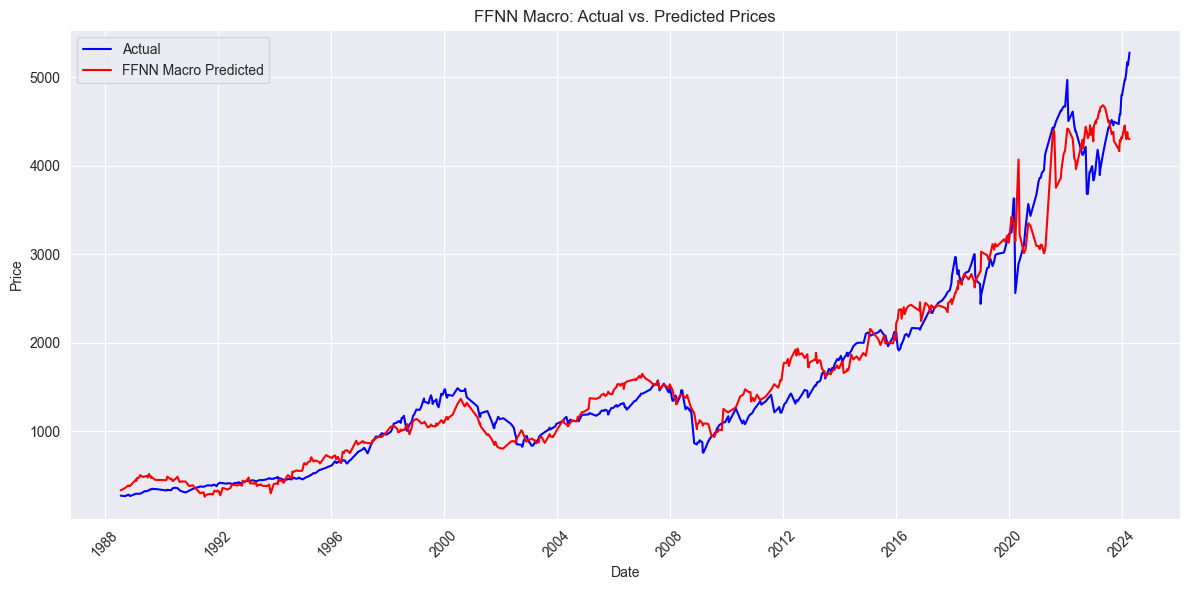

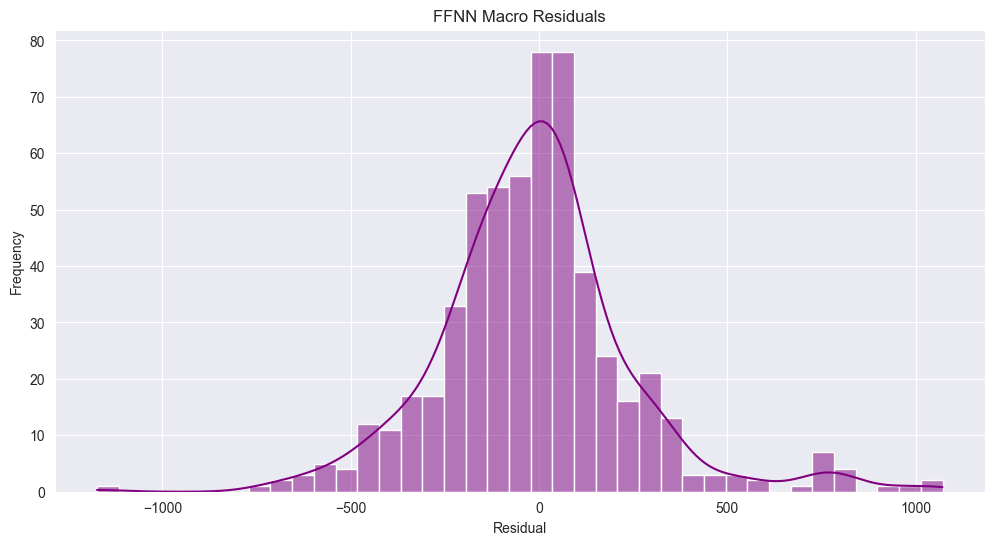

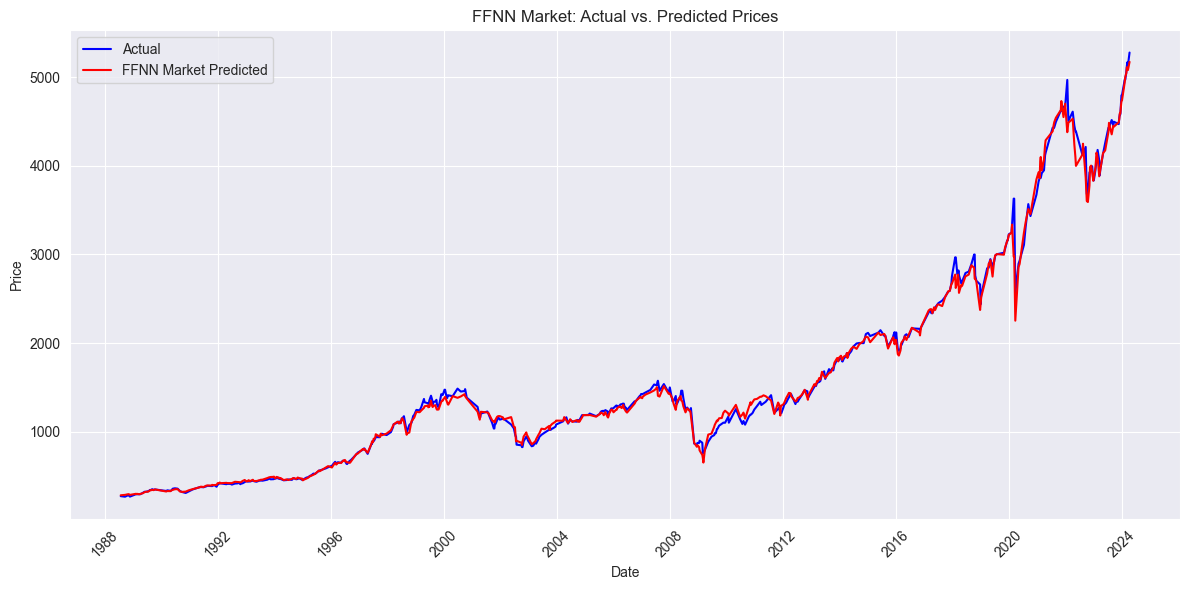

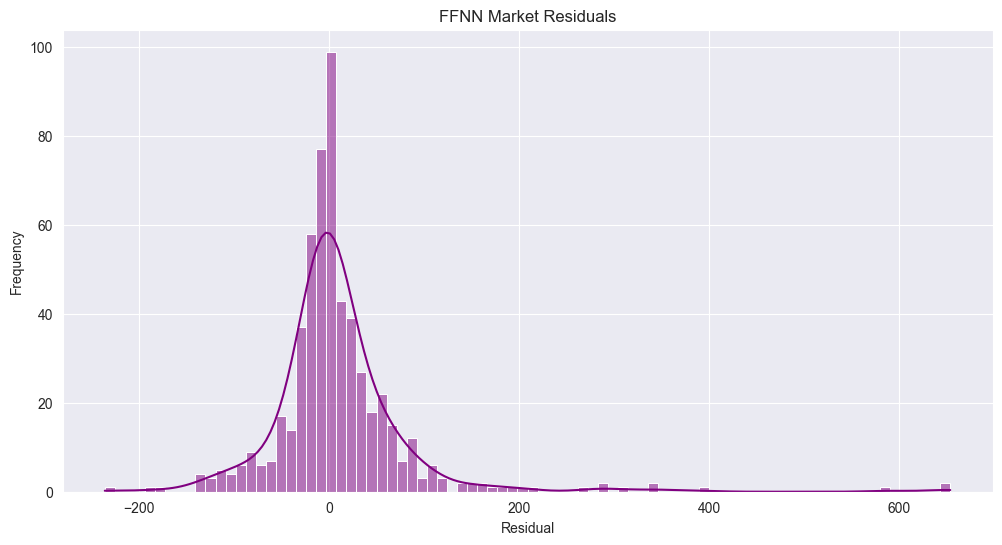

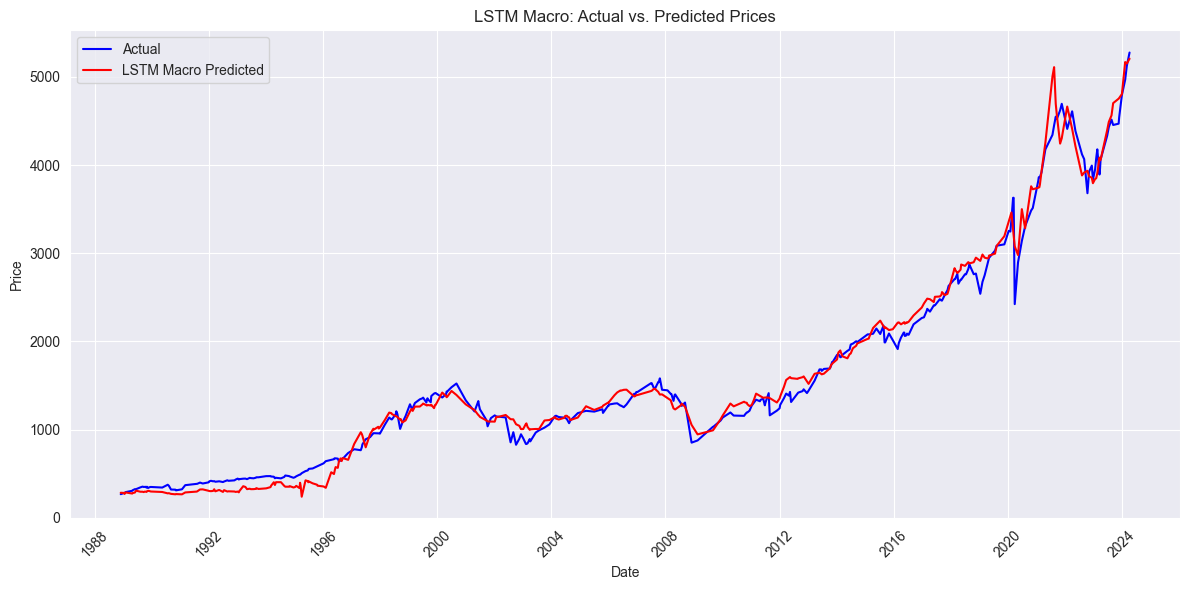

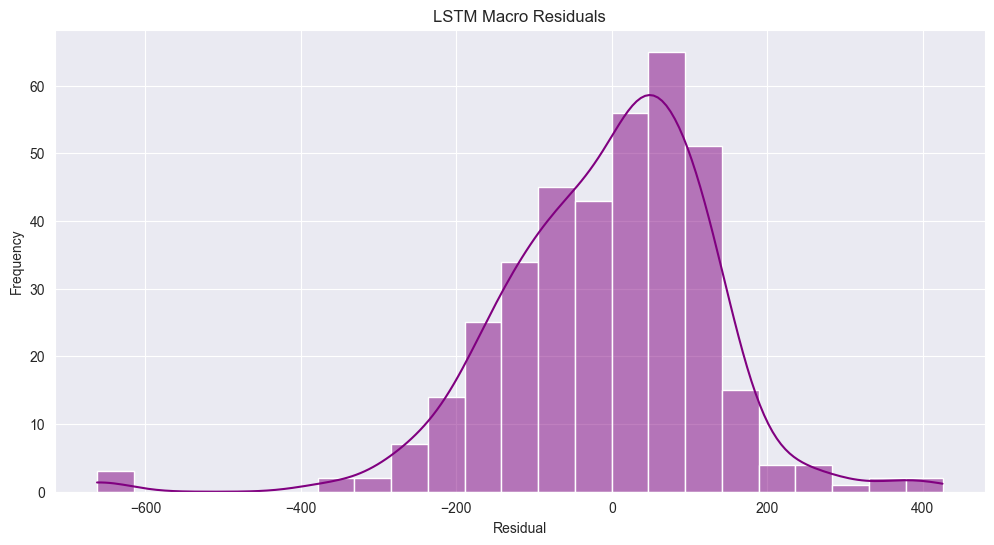

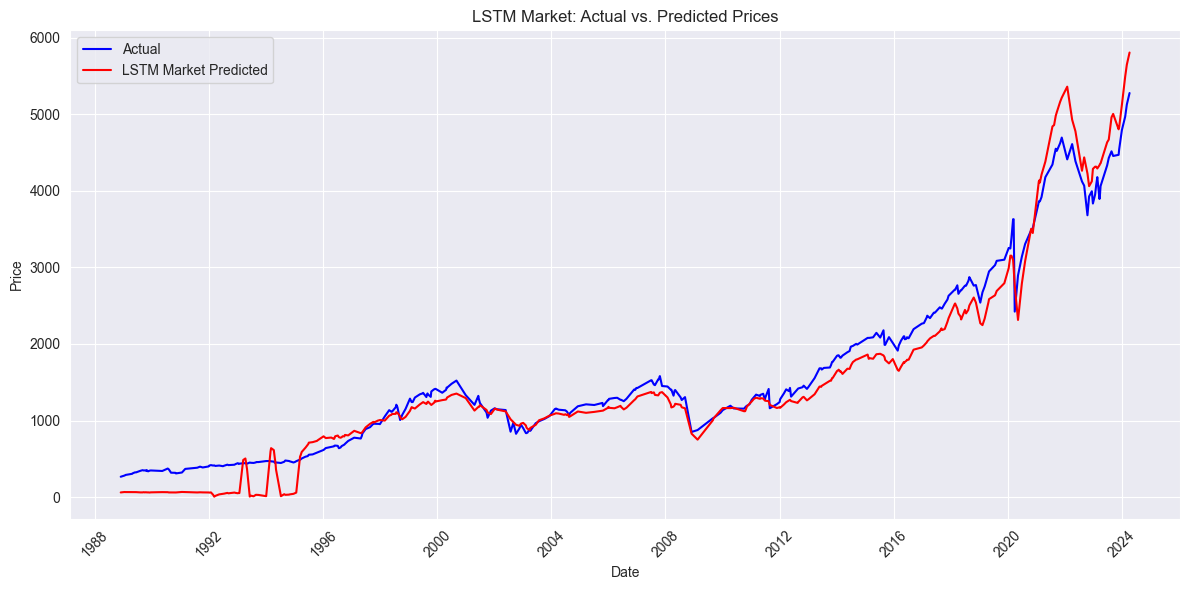

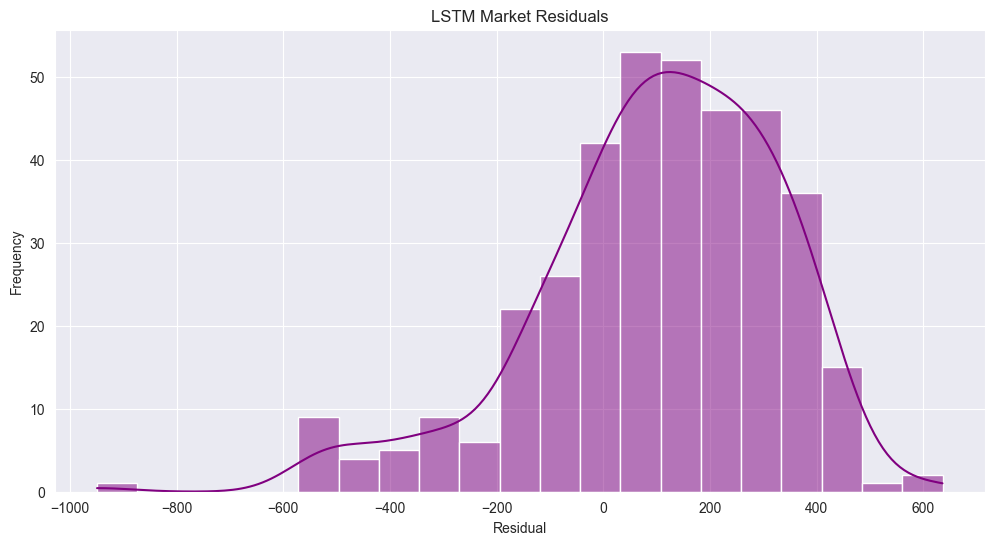

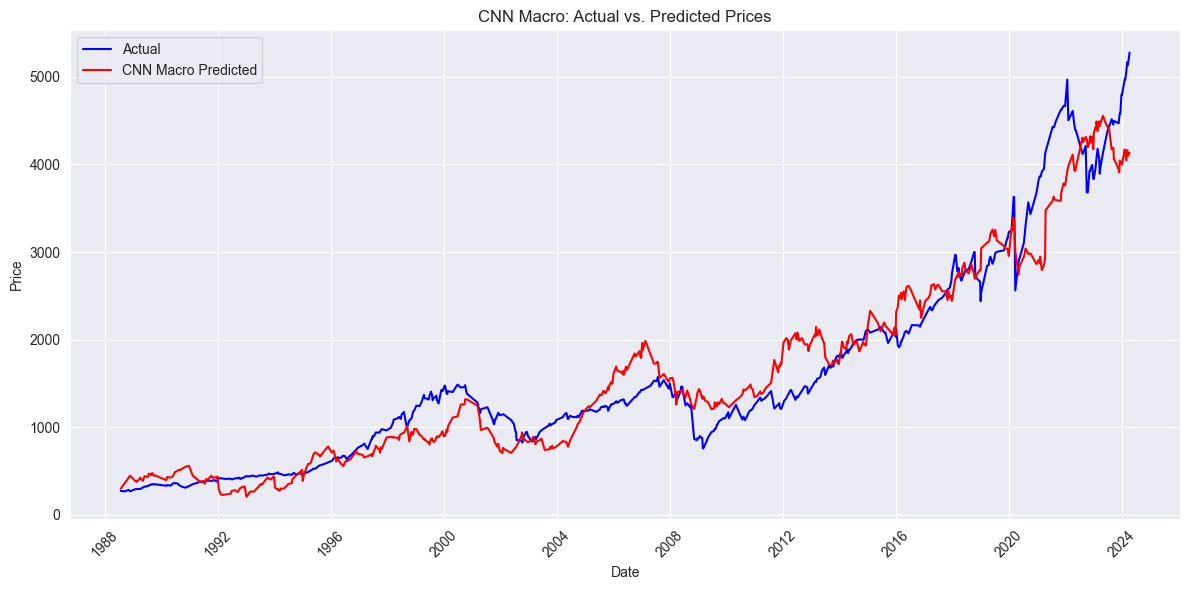

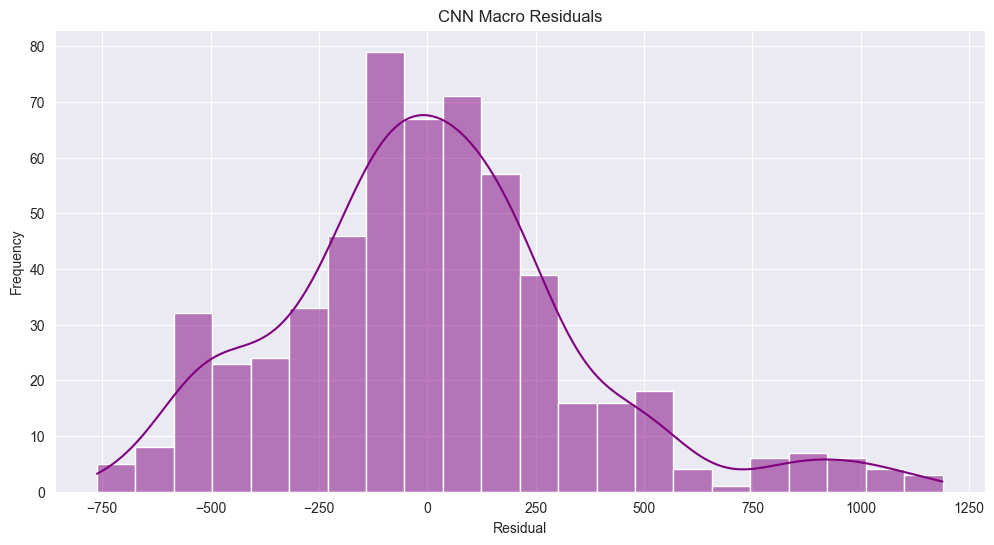

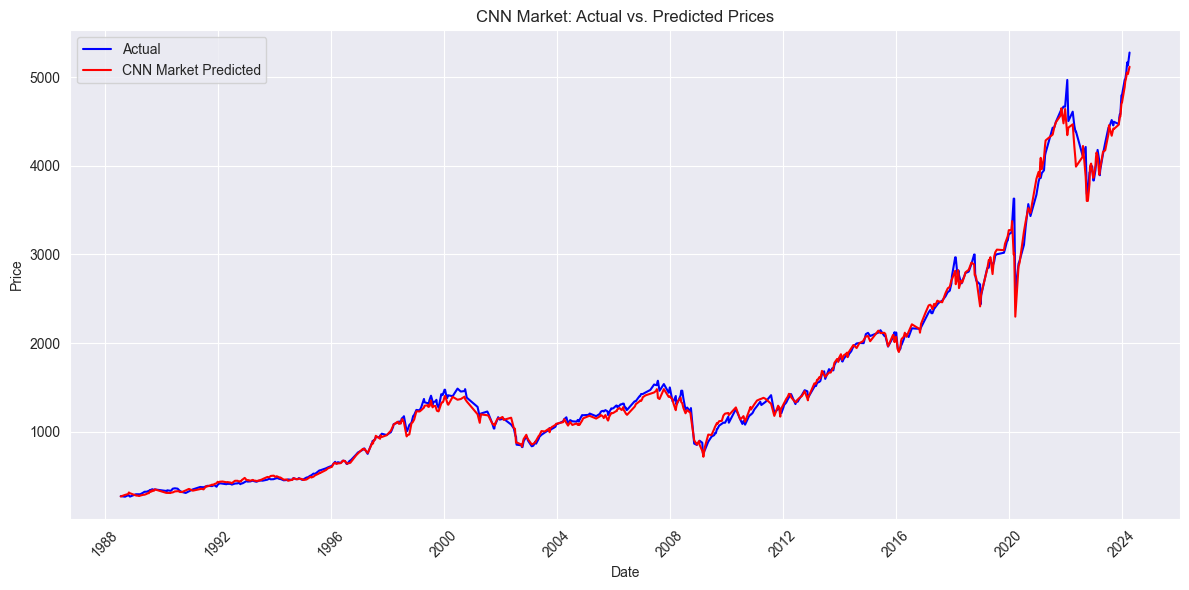

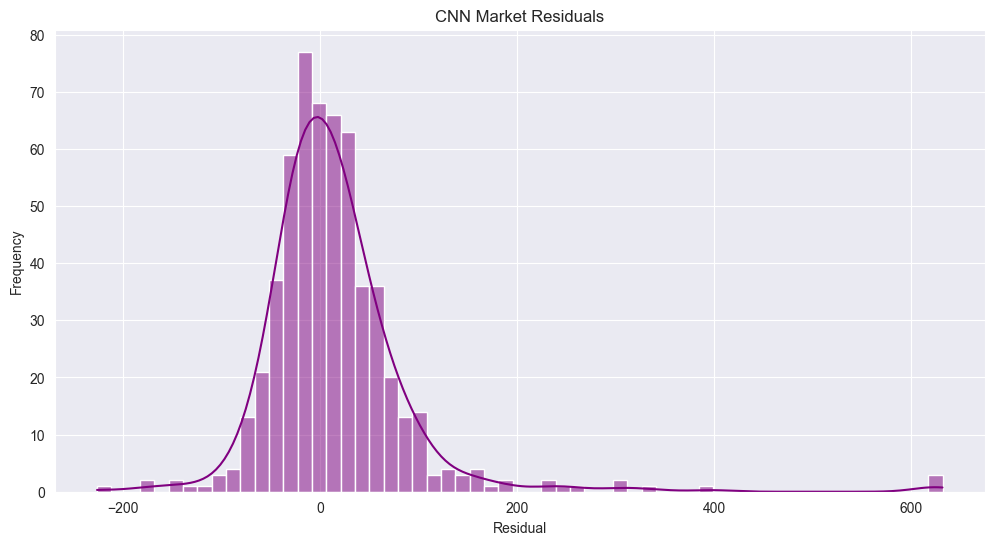

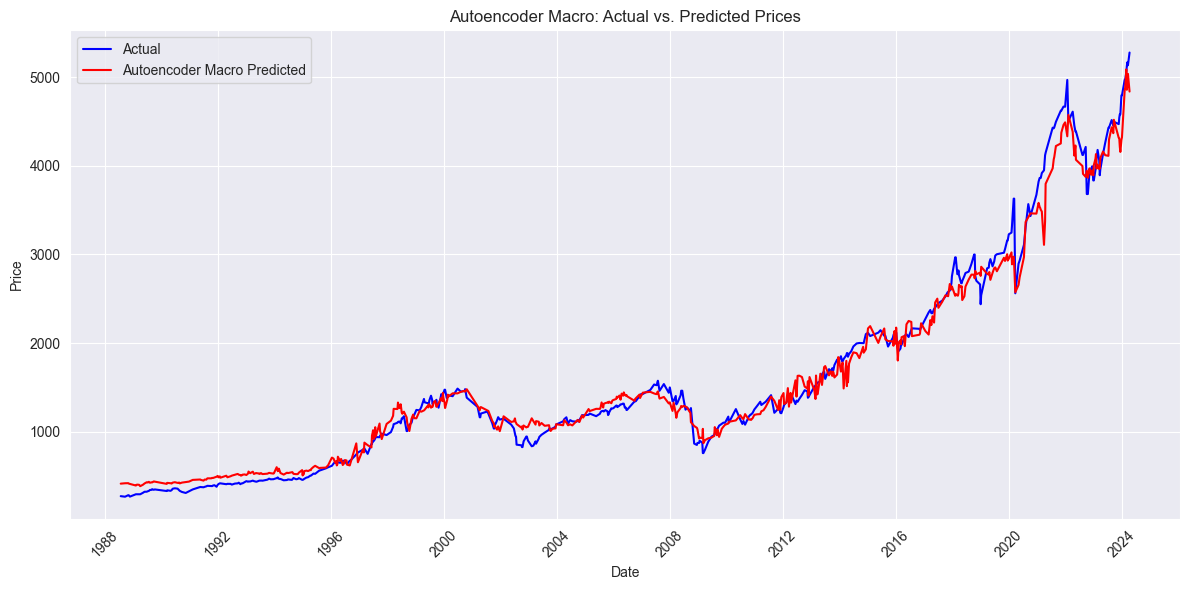

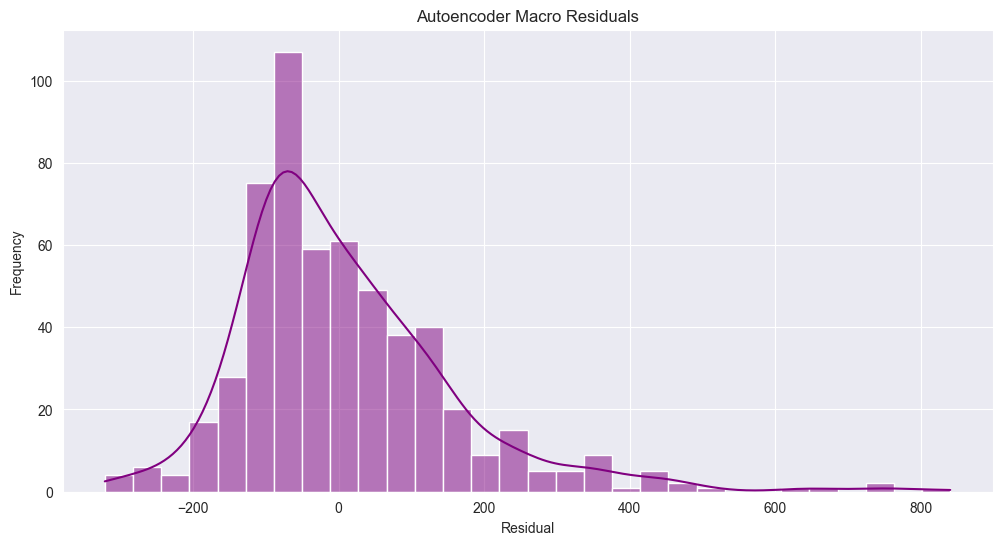

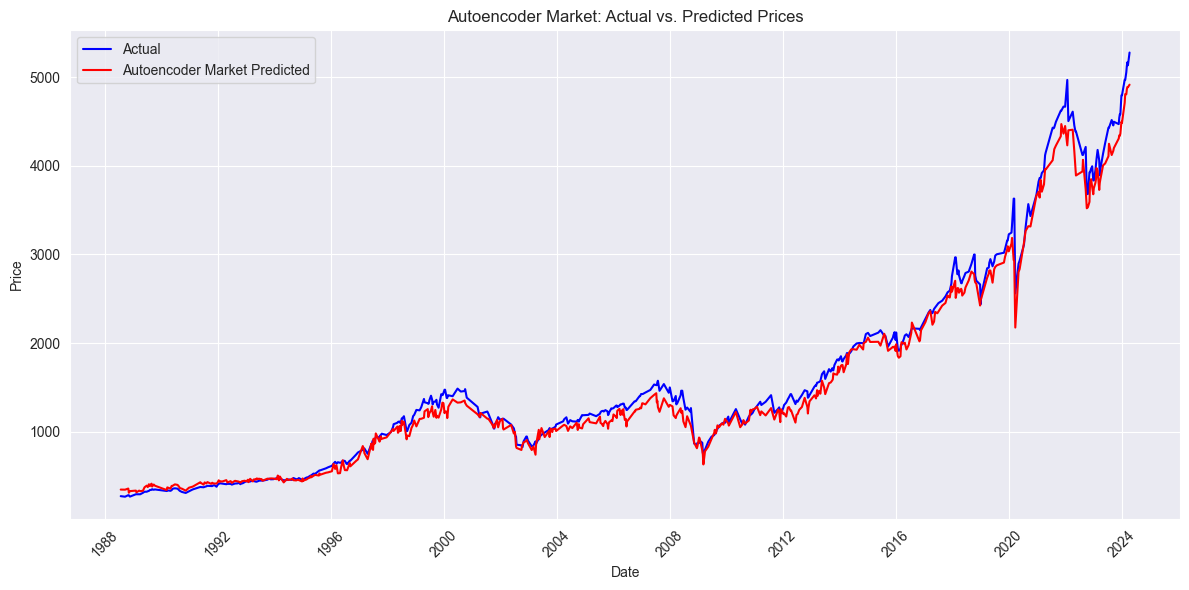

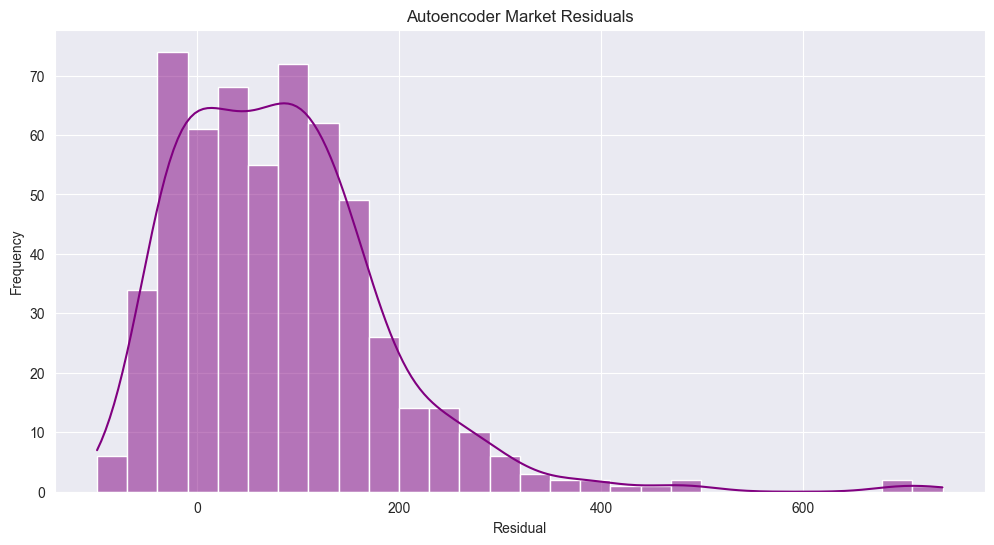

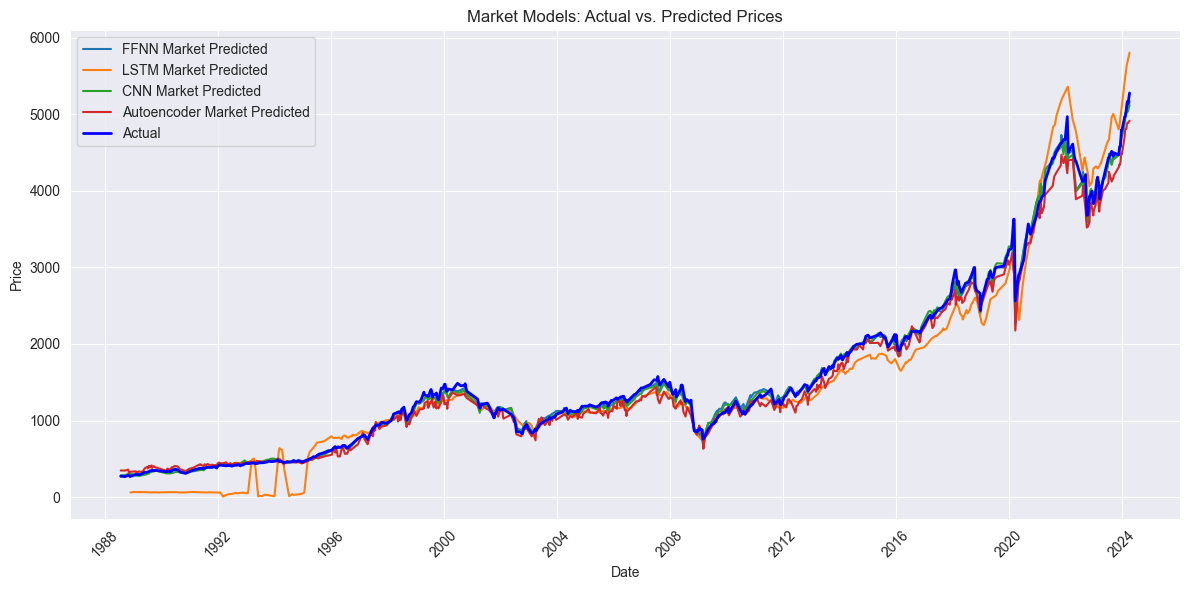

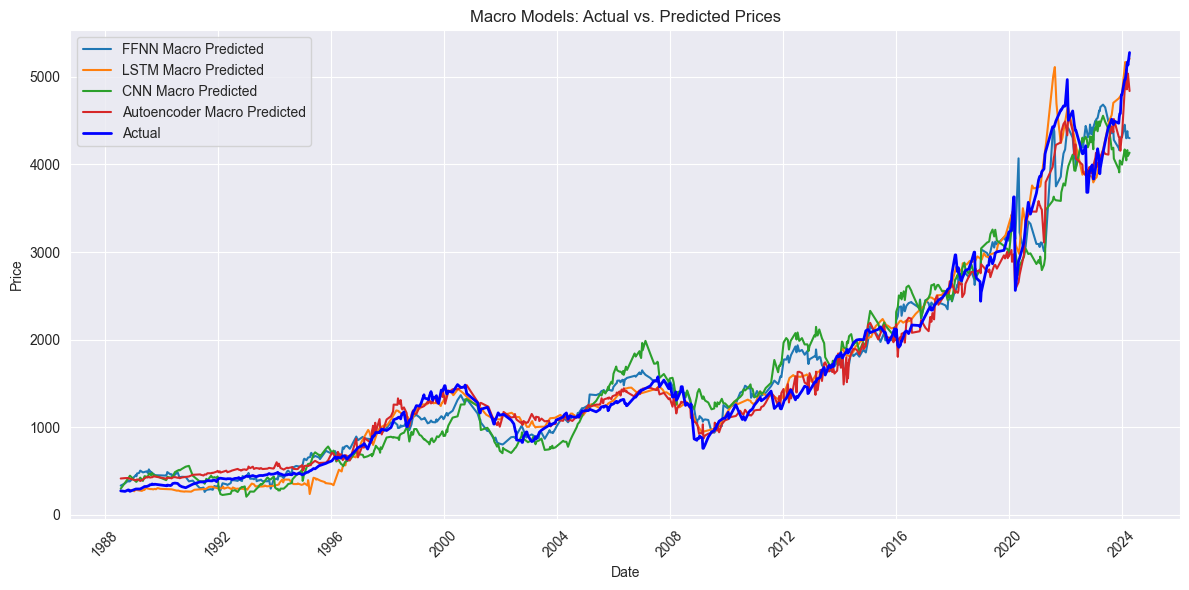

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import pandas as pd

features_macro_scaled = scaler.fit_transform(features_macro)
# In sample predictions
scaler_cnn_pred = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_macro = scaler_cnn_pred.fit_transform(X_train_macro)

# In sample predictions
ffnn_macro_train_predictions = ffnn_model_macro.predict(X_train_macro)
lstm_macro_train_predictions = lstm_model_macro.predict(X_train_macro_prepared)
cnn_macro_train_predictions = cnn_model_macro.predict(X_train_scaled_macro)
autoencoder_macro_train_predictions = ae_prediction_model_macro.predict(X_train_macro_encoded)

scaler_cnn_pred = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_market = scaler_cnn_pred.fit_transform(X_train_market)

# In sample predictions
ffnn_market_train_predictions = ffnn_model_market.predict(X_train_market)
lstm_market_train_predictions = lstm_model_market.predict(X_train_market_prepared)
cnn_market_train_predictions = cnn_model_market.predict(X_train_scaled_market)
autoencoder_market_train_predictions = ae_prediction_model_market.predict(X_train_market_encoded)

# Function to evaluate and compare models
def evaluate_model_performance(model_name, y_train, y_test, train_predictions, test_predictions):
    # Calculate metrics
    in_sample_mse = mean_squared_error(y_train, train_predictions)
    out_sample_mse = mean_squared_error(y_test, test_predictions)
    in_sample_r2 = r2_score(y_train, train_predictions)
    out_sample_r2 = r2_score(y_test, test_predictions)
    
    # Calculate proportion correct and IC
    in_sample_proportion_correct = calculate_proportion_correct(train_predictions, y_train)
    out_sample_proportion_correct = calculate_proportion_correct(test_predictions, y_test)
    in_sample_ic = calculate_ic(in_sample_proportion_correct)
    out_sample_ic = calculate_ic(out_sample_proportion_correct)
    
    sharpe_ratio = calculate_sharpe_ratio(test_predictions, y_test)
    
    return {
        "Model": model_name,
        "In-sample MSE": in_sample_mse,
        "Out-sample MSE": out_sample_mse,
        "In-sample R2": in_sample_r2,
        "Out-sample R2": out_sample_r2,
        "In-sample IC": in_sample_ic,
        "Out-sample IC": out_sample_ic,
        "Sharpe Ratio": sharpe_ratio
    }

# Evaluate and compare all models
models_performance = []

# FFNN Macro
models_performance.append(evaluate_model_performance("FFNN Macro", y_train_macro.values, y_test_macro.values, ffnn_macro_train_predictions, ffnn_macro_predictions))

# FFNN Market
models_performance.append(evaluate_model_performance("FFNN Market", y_train_market.values, y_test_market.values, ffnn_market_train_predictions, ffnn_market_predictions))

# LSTM Macro
models_performance.append(evaluate_model_performance("LSTM Macro", y_train_macro_prepared, y_test_macro_prepared, lstm_macro_train_predictions, lstm_macro_predictions))

# LSTM Market
models_performance.append(evaluate_model_performance("LSTM Market", y_train_market_prepared, y_test_market_prepared, lstm_market_train_predictions, lstm_market_predictions))

# CNN Macro
models_performance.append(evaluate_model_performance("CNN Macro", y_train_macro.values, y_test_macro.values, cnn_macro_train_predictions, cnn_macro_predictions))

# CNN Market
models_performance.append(evaluate_model_performance("CNN Market", y_train_market.values, y_test_market.values, cnn_market_train_predictions, cnn_market_predictions))

# Autoencoder Macro
models_performance.append(evaluate_model_performance("Autoencoder Macro", y_train_macro.values, y_test_macro.values, autoencoder_macro_train_predictions, autoencoder_macro_predictions))

# Autoencoder Market
models_performance.append(evaluate_model_performance("Autoencoder Market", y_train_market.values, y_test_market.values, autoencoder_market_train_predictions, autoencoder_market_predictions))

# Convert to DataFrame for easy visualization
performance_df = pd.DataFrame(models_performance)
display(performance_df)

# Function to plot Actual vs. Predicted and Residuals
def plot_actual_vs_predicted_and_residuals(model_name, y_test, predictions, dates):
    min_length = min(len(y_test), len(predictions), len(dates))
    y_test = y_test[:min_length]
    predictions = predictions[:min_length]
    dates = dates[:min_length]

    # Create a DataFrame with dates, actual values, and predictions
    df = pd.DataFrame({
        'Date': dates,
        'Actual': y_test,
        'Predicted': predictions.flatten()
    })
    df = df.sort_values('Date')

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Actual'], label='Actual', color='blue')
    plt.plot(df['Date'], df['Predicted'], label=model_name + ' Predicted', color='red')
    plt.title(f'{model_name}: Actual vs. Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    residuals = df['Actual'] - df['Predicted']
    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, kde=True, color='purple')
    plt.title(f'{model_name} Residuals')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.show()

# Plot for each model
for model in models_performance:
    model_name = model["Model"]
    if "Macro" in model_name:
        if "LSTM" in model_name:
            y_test = y_test_macro_prepared
            predictions = lstm_macro_predictions
            dates = data.loc[test_indices, 'Date']
        elif "Autoencoder" in model_name:
            y_test = y_test_macro
            predictions = autoencoder_macro_predictions
            dates = data.loc[y_test_macro.index, 'Date']
        else:
            y_test = y_test_macro.values
            predictions = cnn_macro_predictions if model_name == "CNN Macro" else ffnn_macro_predictions
            dates = data.loc[y_test_macro.index, 'Date']
    else:
        if "LSTM" in model_name:
            y_test = y_test_market_prepared
            predictions = lstm_market_predictions
            dates = data.loc[test_indices, 'Date']
        elif "Autoencoder" in model_name:
            y_test = y_test_market
            predictions = autoencoder_market_predictions
            dates = data.loc[y_test_market.index, 'Date']
        else:
            y_test = y_test_market.values
            predictions = cnn_market_predictions if model_name == "CNN Market" else ffnn_market_predictions
            dates = data.loc[y_test_market.index, 'Date']

    plot_actual_vs_predicted_and_residuals(model_name, y_test, predictions, dates)

# Combined plot for all market predictions
def plot_combined_actual_vs_predicted_market(models_performance, data):
    plt.figure(figsize=(12, 6))
    for model in models_performance:
        model_name = model["Model"]
        if "Market" in model_name:
            if "LSTM" in model_name:
                y_test = y_test_market_prepared
                predictions = lstm_market_predictions
                dates = data.loc[test_indices, 'Date']
            elif "Autoencoder" in model_name:
                y_test = y_test_market
                predictions = autoencoder_market_predictions
                dates = data.loc[y_test_market.index, 'Date']
            else:
                y_test = y_test_market.values
                predictions = cnn_market_predictions if model_name == "CNN Market" else ffnn_market_predictions
                dates = data.loc[y_test_market.index, 'Date']

            min_length = min(len(y_test), len(predictions), len(dates))
            y_test = y_test[:min_length]
            predictions = predictions[:min_length]
            dates = dates[:min_length]

            # Create a DataFrame with dates, actual values, and predictions
            df = pd.DataFrame({
                'Date': dates,
                'Actual': y_test,
                'Predicted': predictions.flatten()
            })
            df = df.sort_values('Date')

            plt.plot(df['Date'], df['Predicted'], label=model_name + ' Predicted')
    
    plt.plot(df['Date'], df['Actual'], label='Actual', color='blue', linewidth=2)
    plt.title('Market Models: Actual vs. Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Combined plot for all macro predictions
def plot_combined_actual_vs_predicted_macro(models_performance, data):
    plt.figure(figsize=(12, 6))
    for model in models_performance:
        model_name = model["Model"]
        if "Macro" in model_name:
            if "LSTM" in model_name:
                y_test = y_test_macro_prepared
                predictions = lstm_macro_predictions
                dates = data.loc[test_indices, 'Date']
            elif "Autoencoder" in model_name:
                y_test = y_test_macro
                predictions = autoencoder_macro_predictions
                dates = data.loc[y_test_macro.index, 'Date']
            else:
                y_test = y_test_macro.values
                predictions = cnn_macro_predictions if model_name == "CNN Macro" else ffnn_macro_predictions
                dates = data.loc[y_test_macro.index, 'Date']

            min_length = min(len(y_test), len(predictions), len(dates))
            y_test = y_test[:min_length]
            predictions = predictions[:min_length]
            dates = dates[:min_length]

            # Create a DataFrame with dates, actual values, and predictions
            df = pd.DataFrame({
                'Date': dates,
                'Actual': y_test,
                'Predicted': predictions.flatten()
            })
            df = df.sort_values('Date')

            plt.plot(df['Date'], df['Predicted'], label=model_name + ' Predicted')
    
    plt.plot(df['Date'], df['Actual'], label='Actual', color='blue', linewidth=2)
    plt.title('Macro Models: Actual vs. Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_combined_actual_vs_predicted_market(models_performance, data)
plot_combined_actual_vs_predicted_macro(models_performance, data)


## Evaluation
Best Models: FFNN Market and CNN Market show the best overall performance.
Moderate Models: CNN Macro and FFNN Macro have moderate performance with better directional accuracy (IC).
Poor Model: LSTM Macro performs poorly with negative R² and low IC.

### Summary
Calculated Model Accuracy: We used MSE and R-squared to evaluate model performance.
Visualized Results: Plotted actual vs. predicted values for both in-sample and out-of-sample data.
Used Multiple Signal Sets: Evaluated models with macroeconomic and market/technical signals, providing economic motivation.
Analyzed Hypotheses: Formulated and tested hypotheses based on signal sets and discussed the results.
This comprehensive approach ensures we have a detailed analysis and understanding of the performance of our trading algorithm. If you need any further details or additional steps, please let me know!